In [12]:
import tensorflow as tf
import numpy as np

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(64,)),
  tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dense(5, activation='sigmoid'),
])

In [13]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

# Компилируем модель
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [14]:
from spectrum import font, font_ids, test_labels

train_data = []

font_len = len(font_ids)
for i in range(font_len):
  train_data.append(font[font_ids[i]])

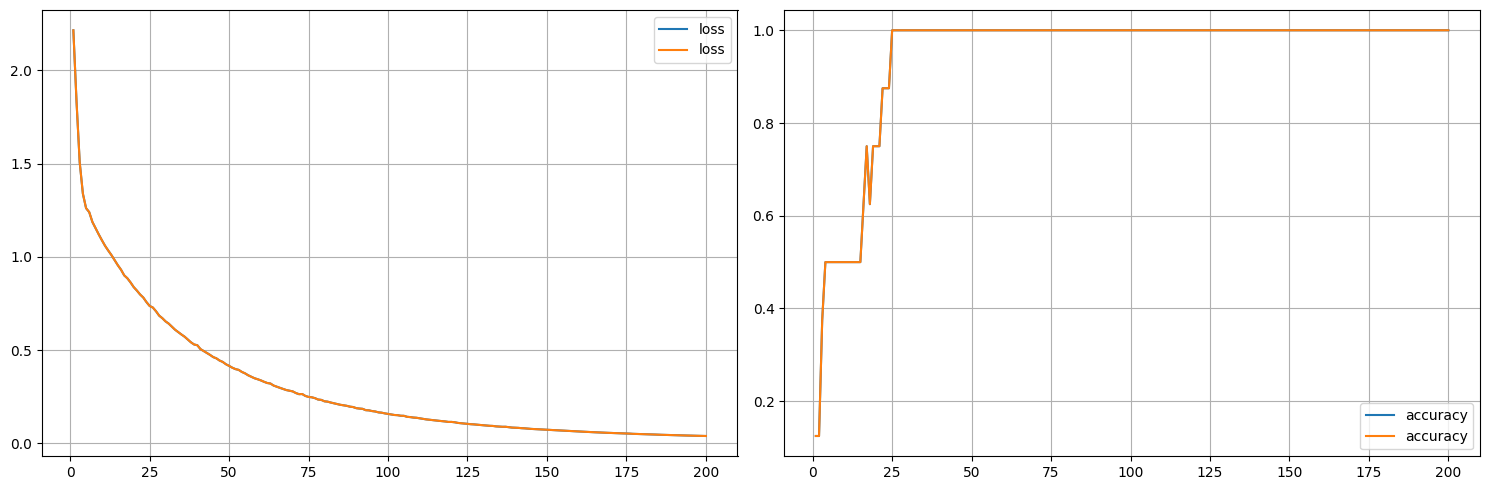

8/8 [==============================] - 0s 33ms/step - loss: 0.0387 - accuracy: 1.0000


In [15]:
from plot_learning import PlotLearning

model.fit(train_data, test_labels, epochs=200, batch_size=1, callbacks=[PlotLearning()])

1/1 [==============================] - 0s 37ms/step


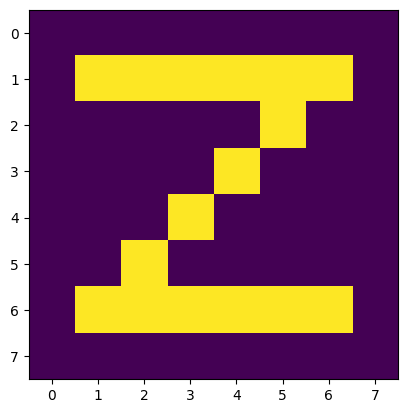

predictions [[0.33784845 0.14021653 0.13621135 0.18833299 0.19739069]]
with prediction = 0.3378484547138214 it's letter Z
1/1 [==============================] - 0s 16ms/step


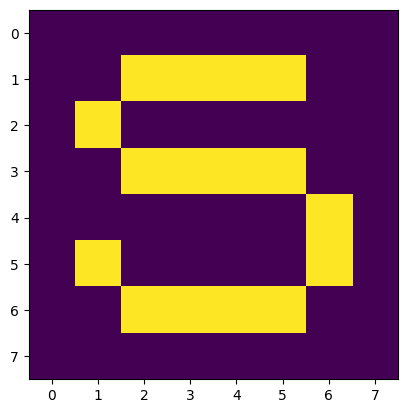

predictions [[0.13409495 0.33518875 0.21816577 0.1512254  0.16132514]]
with prediction = 0.33518874645233154 it's letter S
1/1 [==============================] - 0s 15ms/step


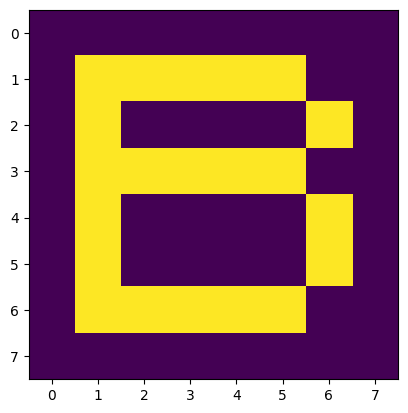

predictions [[0.13089548 0.19498697 0.31707284 0.20200315 0.15504152]]
with prediction = 0.3170728385448456 it's letter B
1/1 [==============================] - 0s 16ms/step


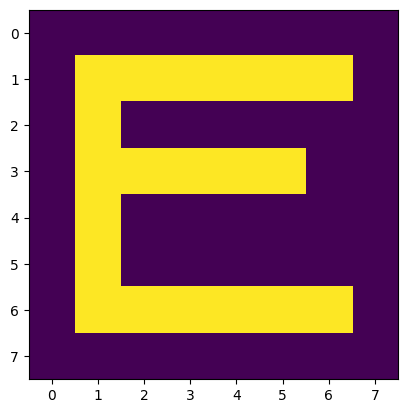

predictions [[0.1574914  0.14616819 0.19703092 0.3231525  0.17615706]]
with prediction = 0.3231525123119354 it's letter E
1/1 [==============================] - 0s 18ms/step


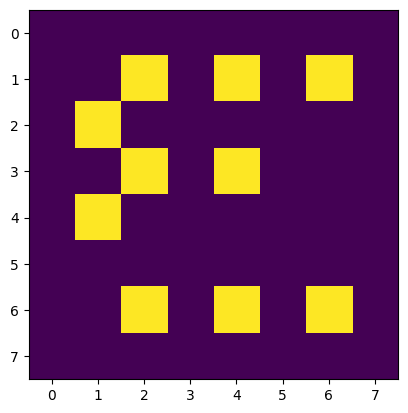

predictions [[0.15926191 0.14488862 0.13917135 0.21420199 0.3424762 ]]
with prediction = 0.3424761891365051 it's letter r1
1/1 [==============================] - 0s 18ms/step


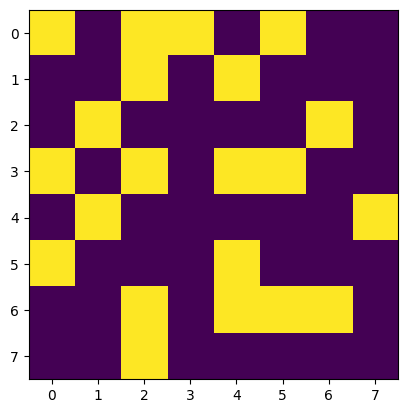

predictions [[0.1486591  0.14894336 0.16667847 0.15872677 0.37699223]]
with prediction = 0.37699222564697266 it's letter r1
1/1 [==============================] - 0s 16ms/step


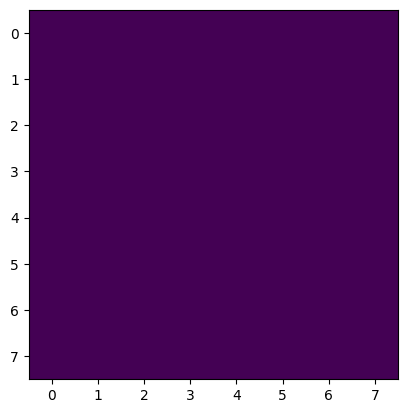

predictions [[0.1643505  0.1709397  0.16159672 0.15455316 0.34856   ]]
with prediction = 0.34856000542640686 it's letter r1
1/1 [==============================] - 0s 18ms/step


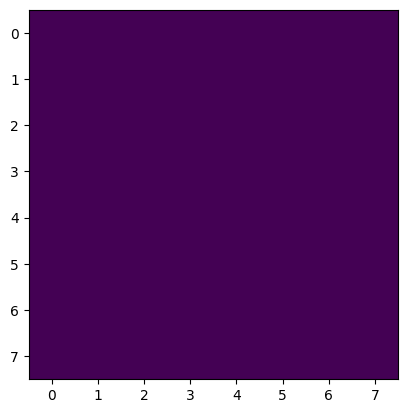

predictions [[0.16573319 0.143064   0.16777039 0.15260306 0.3708294 ]]
with prediction = 0.37082940340042114 it's letter r1


In [18]:
from colors import bcolors as bc
import matplotlib.pyplot as plt

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

test_count = len(font_ids)
for i in range(test_count):
  input_data = np.expand_dims(font[font_ids[i]], axis=0)
  predictions = probability_model.predict(input_data)

  plt.imshow(input_data.reshape((8, 8)))
  plt.show()

  print(f'{bc.OKBLUE}predictions{bc.ENDC}', predictions)

  index = np.argmax(predictions)
  is_true = index == test_labels[i]
  print(
    'with prediction =',
    f'{bc.BOLD}{bc.OKGREEN if is_true else bc.FAIL}{predictions[0][index]}{bc.ENDC}',
    'it\'s letter',
    f'{bc.BOLD}{bc.OKGREEN if is_true else bc.FAIL}{font_ids[index]}{bc.ENDC}'
  )

In [47]:
import random

def run_random_tests(random_count):
  global test_count, probability_model

  for i in range(test_count):
    input_data = np.expand_dims(font[font_ids[i]], axis=0)

    for j in range(random_count):
      index = random.randint(0, len(input_data[0]) - 1)
      input_data[0][index] = int(not input_data[0][index])

    predictions = probability_model.predict(input_data)

    plt.imshow(input_data.reshape((8, 8)))
    plt.show()

    print(f'{bc.OKBLUE}predictions{bc.ENDC}', predictions)

    index = np.argmax(predictions)
    is_true = index == test_labels[i]
    print(
      'with prediction =',
      f'{bc.BOLD}{bc.OKGREEN if is_true else bc.FAIL}{predictions[0][index]}{bc.ENDC}',
      'it\'s letter',
      f'{bc.BOLD}{bc.OKGREEN if is_true else bc.FAIL}{font_ids[index]}{bc.ENDC}'
    )

1/1 [==============================] - 0s 15ms/step


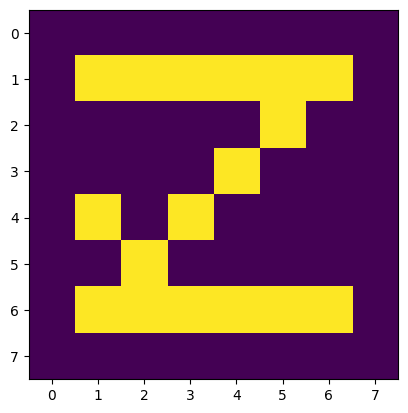

predictions [[0.32407543 0.12893331 0.13662209 0.2004989  0.20987028]]
with prediction = 0.3240754306316376 it's letter Z
1/1 [==============================] - 0s 17ms/step


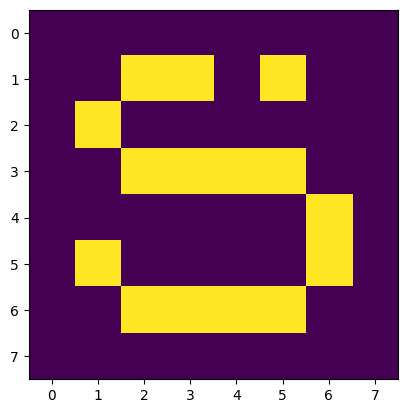

predictions [[0.13236141 0.3318725  0.22371222 0.14999416 0.16205981]]
with prediction = 0.33187249302864075 it's letter S
1/1 [==============================] - 0s 17ms/step


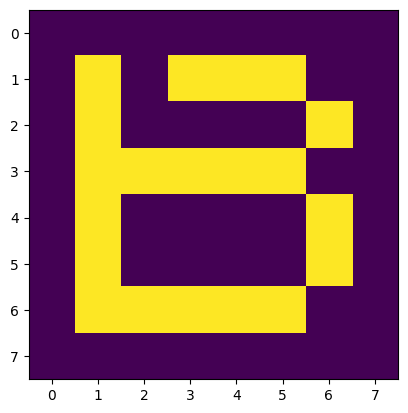

predictions [[0.13074537 0.1900966  0.3173679  0.20256394 0.15922625]]
with prediction = 0.31736791133880615 it's letter B
1/1 [==============================] - 0s 15ms/step


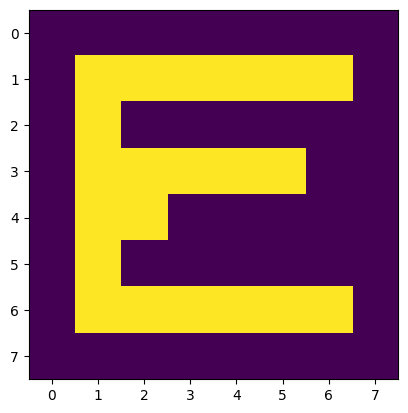

predictions [[0.15590388 0.14512615 0.19128132 0.3234625  0.18422614]]
with prediction = 0.32346248626708984 it's letter E
1/1 [==============================] - 0s 15ms/step


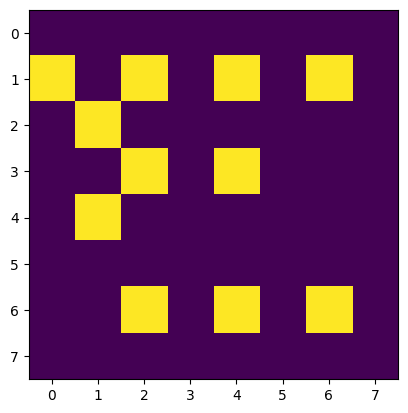

predictions [[0.15884933 0.1465259  0.13990074 0.20910764 0.34561637]]
with prediction = 0.3456163704395294 it's letter r1
1/1 [==============================] - 0s 17ms/step


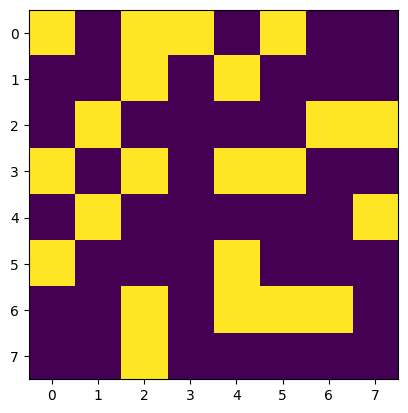

predictions [[0.14882398 0.14833373 0.16731481 0.15853344 0.37699398]]
with prediction = 0.37699398398399353 it's letter r1
1/1 [==============================] - 0s 16ms/step


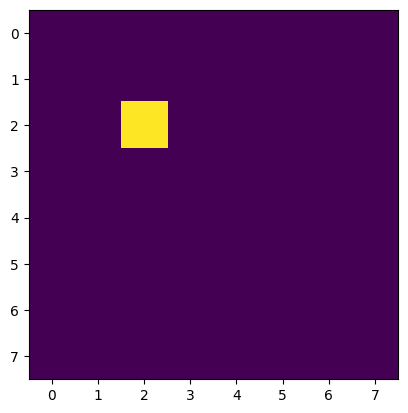

predictions [[0.16336928 0.16967964 0.16205609 0.15393852 0.3509564 ]]
with prediction = 0.35095641016960144 it's letter r1
1/1 [==============================] - 0s 18ms/step


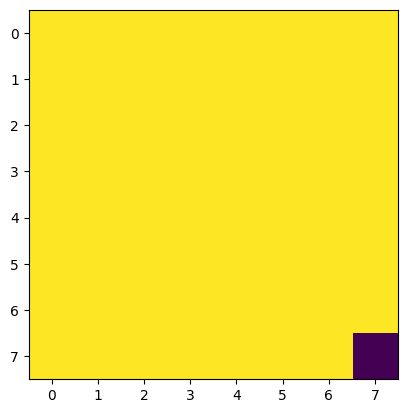

predictions [[0.16733849 0.14272922 0.16877508 0.15181547 0.3693418 ]]
with prediction = 0.36934179067611694 it's letter r1


In [48]:
run_random_tests(1)

1/1 [==============================] - 0s 16ms/step


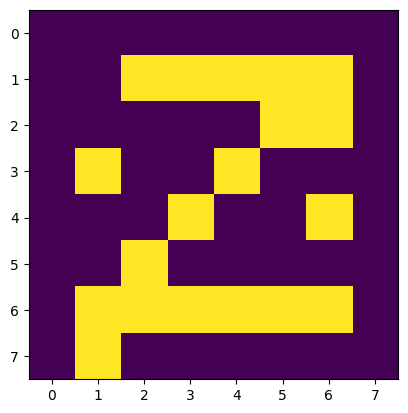

predictions [[0.32426938 0.13826443 0.16341227 0.15707353 0.2169803 ]]
with prediction = 0.3242693841457367 it's letter Z
1/1 [==============================] - 0s 15ms/step


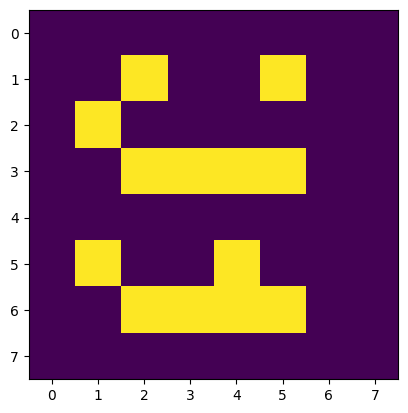

predictions [[0.13096763 0.293288   0.16791387 0.18765578 0.22017469]]
with prediction = 0.293287992477417 it's letter S
1/1 [==============================] - 0s 15ms/step


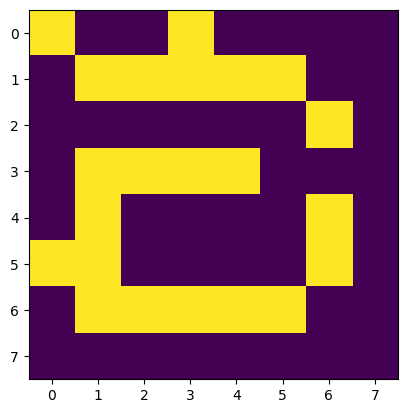

predictions [[0.14109717 0.15657535 0.3160451  0.18213944 0.20414299]]
with prediction = 0.3160451054573059 it's letter B
1/1 [==============================] - 0s 16ms/step


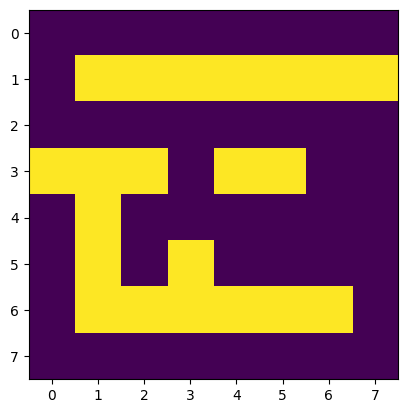

predictions [[0.17746325 0.13092242 0.16908774 0.30522296 0.21730363]]
with prediction = 0.3052229583263397 it's letter E
1/1 [==============================] - 0s 15ms/step


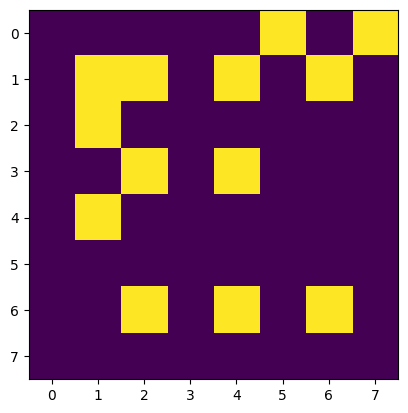

predictions [[0.16426459 0.13280642 0.14065005 0.22643189 0.33584708]]
with prediction = 0.33584707975387573 it's letter r1
1/1 [==============================] - 0s 15ms/step


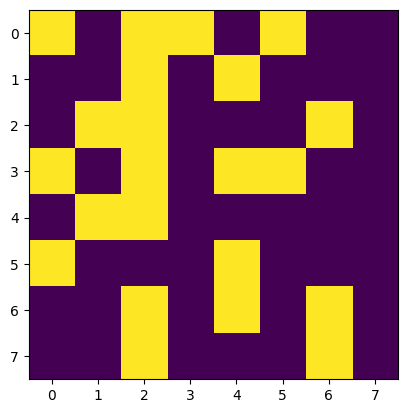

predictions [[0.14827718 0.14712204 0.16749266 0.15751293 0.37959516]]
with prediction = 0.37959516048431396 it's letter r1
1/1 [==============================] - 0s 15ms/step


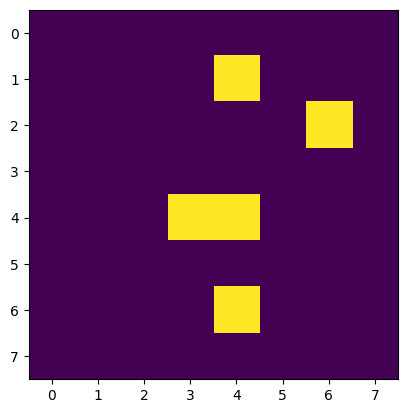

predictions [[0.19990878 0.14769924 0.17790541 0.13601808 0.33846846]]
with prediction = 0.338468462228775 it's letter r1
1/1 [==============================] - 0s 14ms/step


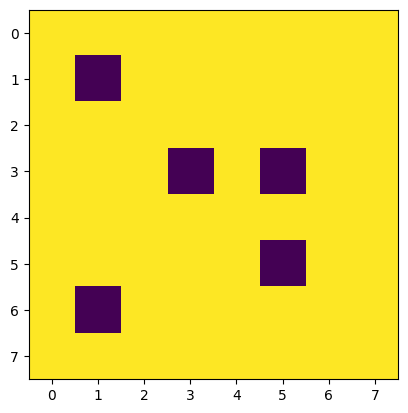

predictions [[0.17279005 0.14783652 0.15253848 0.14563923 0.3811957 ]]
with prediction = 0.38119569420814514 it's letter r1


In [49]:
run_random_tests(5)

1/1 [==============================] - 0s 16ms/step


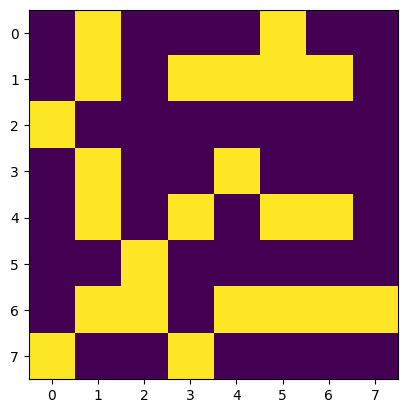

predictions [[0.27819195 0.11794833 0.14171678 0.1920281  0.27011484]]
with prediction = 0.2781919538974762 it's letter Z
1/1 [==============================] - 0s 16ms/step


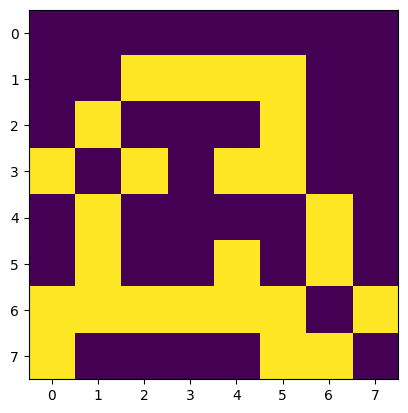

predictions [[0.14076121 0.24779424 0.2240869  0.14584918 0.24150844]]
with prediction = 0.2477942407131195 it's letter S
1/1 [==============================] - 0s 15ms/step


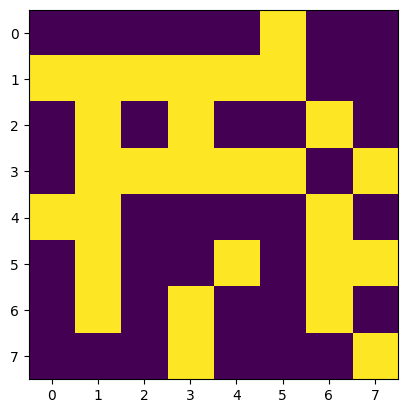

predictions [[0.11749632 0.14322276 0.28207523 0.19534463 0.26186103]]
with prediction = 0.2820752263069153 it's letter B
1/1 [==============================] - 0s 15ms/step


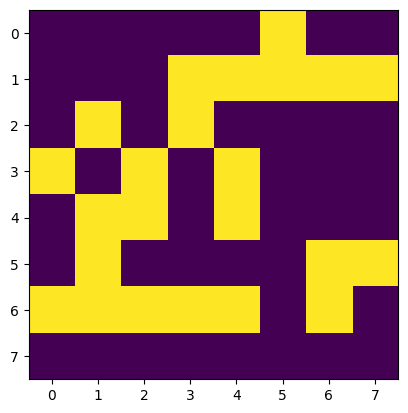

predictions [[0.15615958 0.15354589 0.14530647 0.21423057 0.33075744]]
with prediction = 0.3307574391365051 it's letter r1
1/1 [==============================] - 0s 15ms/step


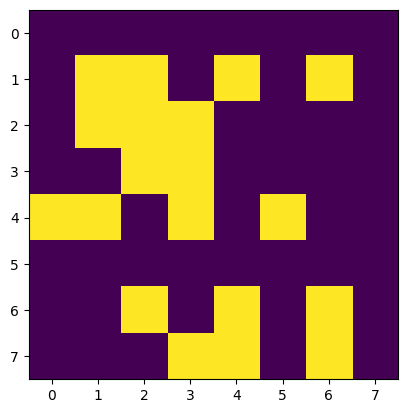

predictions [[0.16634266 0.13380952 0.13934167 0.22446859 0.33603758]]
with prediction = 0.3360375761985779 it's letter r1
1/1 [==============================] - 0s 15ms/step


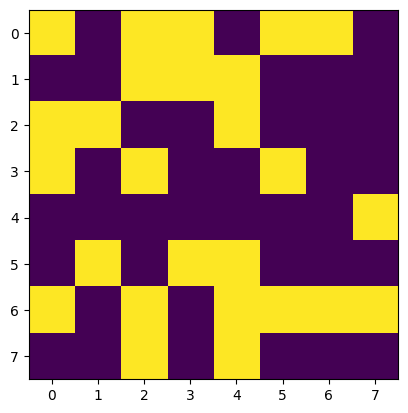

predictions [[0.14277314 0.18471579 0.1427379  0.16338812 0.3663851 ]]
with prediction = 0.3663851022720337 it's letter r1
1/1 [==============================] - 0s 15ms/step


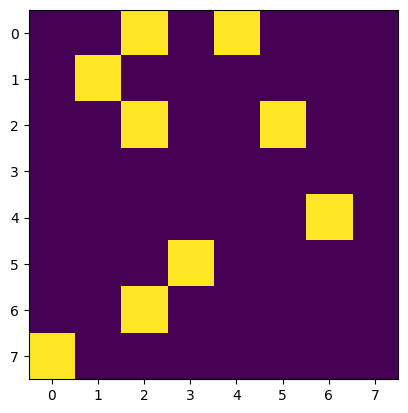

predictions [[0.19455127 0.15529983 0.17283103 0.1380236  0.33929428]]
with prediction = 0.33929428458213806 it's letter r1
1/1 [==============================] - 0s 14ms/step


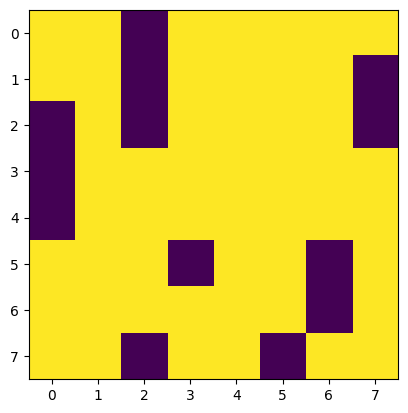

predictions [[0.16474566 0.13566822 0.18932623 0.16051765 0.34974226]]
with prediction = 0.34974226355552673 it's letter r1


In [50]:
run_random_tests(15)